In [15]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pertpy as pt
import warnings
import pickle as pkl
from matplotlib import rcParams
FIGSIZE=(3,3)
rcParams['figure.figsize']=FIGSIZE

In [19]:
with open("/home/icb/alessandro.palma/environment/IMPA/IMPA/project_folder/dino_featurization_project/scib/cpg0000_2.pkl", "rb") as bm_file:
    bm = pkl.load(bm_file)

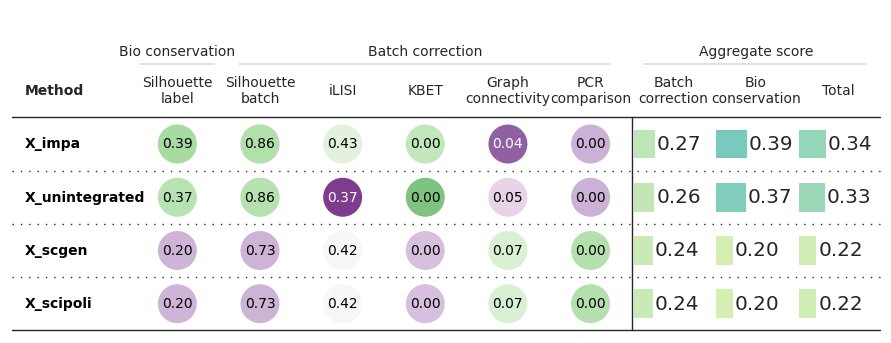

In [20]:
bm.plot_results_table(min_max_scale=False)

In [18]:
df = bm.get_results(min_max_scale=False)
df

,Silhouette label,Silhouette batch,iLISI,KBET,Graph connectivity,PCR comparison,Batch correction,Bio conservation,Total
Embedding,,,,,,,,,
X_scgen,0.418003,0.906,0.343226,0.024241,0.078065,0,0.270306,0.418003,0.358924
X_scipoli,0.418003,0.906,0.343226,0.024241,0.078065,0,0.270306,0.418003,0.358924
X_unintegrated,0.446688,0.925155,0.271456,0.01158,0.064325,0,0.254503,0.446688,0.369814
X_impa,0.441965,0.918011,0.360719,0.00369,0.044619,0,0.265408,0.441965,0.371342
Metric Type,Bio conservation,Batch correction,Batch correction,Batch correction,Batch correction,Batch correction,Aggregate score,Aggregate score,Aggregate score


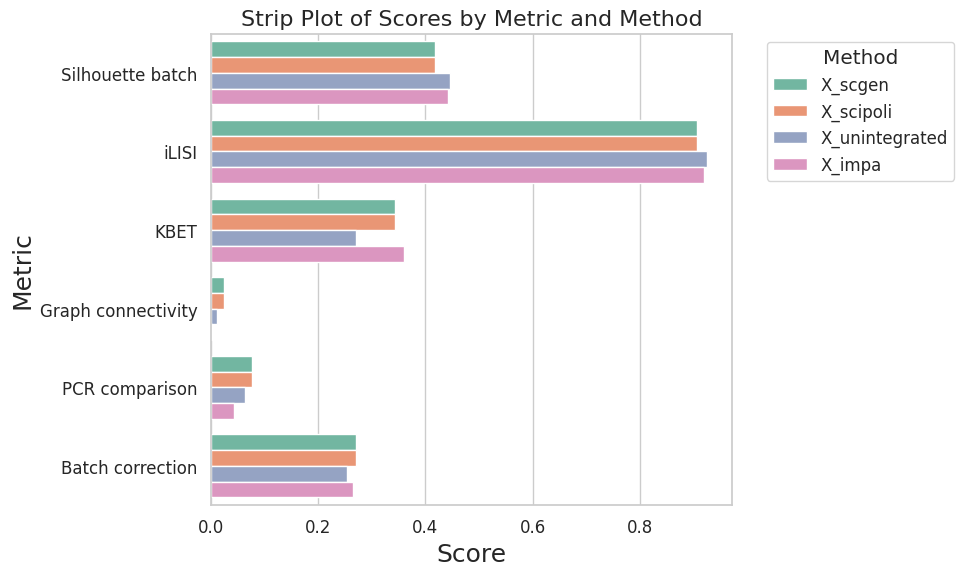

In [14]:
data = {
    'Silhouette batch': [0.418003, 0.418003, 0.446688, 0.441965],
    'iLISI': [0.906, 0.906, 0.925155, 0.918011],
    'KBET': [0.343226, 0.343226, 0.271456, 0.360719],
    'Graph connectivity': [0.024241, 0.024241, 0.01158, 0.00369],
    'PCR comparison': [0.078065, 0.078065, 0.064325, 0.044619],
    'Batch correction': [0.270306, 0.270306, 0.254503, 0.265408],
}

index = ['X_scgen', 'X_scipoli', 'X_unintegrated', 'X_impa']
columns = ['Silhouette batch', 'iLISI', 'KBET', 'Graph connectivity', 'PCR comparison', 'Batch correction']

df = pd.DataFrame(data, index=index, columns=columns)

# Transpose the DataFrame
df_transposed = df

# Reshape the DataFrame for stripplot
df_melted = df_transposed.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')

# Set aesthetic parameters
sns.set(style='whitegrid', font_scale=1.2)

# Plotting with Seaborn - Horizontal Point plot (Swarm plot)
plt.figure(figsize=(10, 6))
palette = sns.color_palette("Set2")  # Choose a suitable color palette
# sns.stripplot(data=df_melted, y='Metric', x='Score', hue='index', palette=palette, dodge=True, jitter=True, size=14)  # Increase size here
sns.barplot(data=df_melted, y='Metric', x='Score', hue='index', palette=palette)  # Increase size here
plt.title('Strip Plot of Scores by Metric and Method', fontsize=16)
plt.xlabel('Score', fontsize=18)
plt.ylabel('Metric', fontsize=18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Place legend outside the plot
plt.legend(title='Method', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()